### Konfigurasi MongoDB
Mengatur URI MongoDB, nama database, dan koleksi yang akan digunakan untuk membaca data.

In [32]:
# Konfigurasi MongoDB
MONGO_URI = "mongodb://localhost:27017"
DB_NAME = "laporan_keuangan"
STOCK_COLLECTION = "xbrl_data"

### Inisialisasi Spark Session
Membuat Spark Session dengan konfigurasi untuk membaca data dari MongoDB menggunakan MongoDB Spark Connector.

In [33]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Fungsi untuk inisialisasi Spark Session
def create_spark_session():
    return (SparkSession.builder
            .appName("Read Stock Data from MongoDB")
            .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1")
            .config("spark.mongodb.input.uri", f"{MONGO_URI}/{DB_NAME}.{STOCK_COLLECTION}")
            .config("spark.executor.memory", "4g")
            .config("spark.driver.memory", "4g")
            .getOrCreate())


### Membuat Spark Session
Memanggil fungsi `create_spark_session` untuk membuat Spark Session.

In [34]:
spark = create_spark_session()


### Pipeline MongoDB
Mendefinisikan pipeline untuk membaca data dari MongoDB. Pipeline ini menggunakan `$match` untuk memfilter dokumen yang memiliki kolom tertentu dan `$project` untuk memilih kolom yang akan diambil.

### Membaca Data dari MongoDB
Menggunakan pipeline untuk membaca data dari MongoDB ke dalam DataFrame Spark.

In [35]:
pipeline = """[
    { "$match": {
        "$or": [
            { "RevenueFromInsurancePremiums": { "$exists": true } },
            { "ProfitLossBeforeIncomeTax": { "$exists": true } },
            { "CashAndCashEquivalentsCashFlows": { "$exists": true } },
            { "NetCashFlowsReceivedFromUsedInOperatingActivities": { "$exists": true } },
            { "NetCashFlowsReceivedFromUsedInInvestingActivities": { "$exists": true } },
            { "NetCashFlowsReceivedFromUsedInFinancingActivities": { "$exists": true } },
            { "ClaimExpenses": { "$exists": true } },
            { "GeneralAndAdministrativeExpenses": { "$exists": true } },
            { "CommissionIncome": { "$exists": true } },
            { "CommissionExpenses": { "$exists": true } },
            { "TaxBenefitExpenses": { "$exists": true } },
            { "OtherComprehensiveIncome": { "$exists": true } },
            { "DividendsReceivedFromInvestingActivities": { "$exists": true } },
            { "OtherCashInflowsOutflowsFromInvestingActivities": { "$exists": true } },
            { "NetIncreaseDecreaseInCashAndCashEquivalents": { "$exists": true } },
            { "EffectOfExchangeRateChangesOnCashAndCashEquivalents": { "$exists": true } },
            { "OtherCashInflowsOutflowsFromOperatingActivities": { "$exists": true } },
            { "Assets": { "$exists": true } },
            { "Equity": { "$exists": true } },
            { "EquityPositionEndOfThePeriod": { "$exists": true } },
            { "Cash": { "$exists": true } },
            { "ProfitFromOperation": { "$exists": true } },
            { "RevenueFromTradingTransactions": { "$exists": true } },
            { "OtherOperatingExpenses": { "$exists": true } }
        ]
    }},
    { "$project": {
        "EntityCode": 1,
        "EntityName": 1,
        "RevenueFromInsurancePremiums": 1,
        "ProfitLossBeforeIncomeTax": 1,
        "CashAndCashEquivalentsCashFlows": 1,
        "NetCashFlowsReceivedFromUsedInOperatingActivities": 1,
        "NetCashFlowsReceivedFromUsedInInvestingActivities": 1,
        "NetCashFlowsReceivedFromUsedInFinancingActivities": 1,
        "ClaimExpenses": 1,
        "GeneralAndAdministrativeExpenses": 1,
        "CommissionIncome": 1,
        "CommissionExpenses": 1,
        "TaxBenefitExpenses": 1,
        "OtherComprehensiveIncome": 1,
        "DividendsReceivedFromInvestingActivities": 1,
        "OtherCashInflowsOutflowsFromInvestingActivities": 1,
        "NetIncreaseDecreaseInCashAndCashEquivalents": 1,
        "EffectOfExchangeRateChangesOnCashAndCashEquivalents": 1,
        "OtherCashInflowsOutflowsFromOperatingActivities": 1,
        "Assets": 1,
        "Equity": 1,
        "EquityPositionEndOfThePeriod": 1,
        "Cash": 1,
        "ProfitFromOperation": 1,
        "RevenueFromTradingTransactions": 1,
        "OtherOperatingExpenses": 1
    }}
]"""

df = spark.read.format("mongo").option("pipeline", pipeline).load()
df = df.select("EntityCode", 
               "EntityName",
               "RevenueFromInsurancePremiums", 
               "ProfitLossBeforeIncomeTax", 
               "CashAndCashEquivalentsCashFlows", 
               "NetCashFlowsReceivedFromUsedInOperatingActivities",
               "NetCashFlowsReceivedFromUsedInInvestingActivities", 
               "NetCashFlowsReceivedFromUsedInFinancingActivities", 
               "ClaimExpenses", 
               "GeneralAndAdministrativeExpenses", 
               "CommissionIncome", 
               "CommissionExpenses", 
               "TaxBenefitExpenses", 
               "OtherComprehensiveIncome", 
               "DividendsReceivedFromInvestingActivities", 
               "OtherCashInflowsOutflowsFromInvestingActivities", 
               "NetIncreaseDecreaseInCashAndCashEquivalents", 
               "EffectOfExchangeRateChangesOnCashAndCashEquivalents", 
               "OtherCashInflowsOutflowsFromOperatingActivities",
                "Assets",
                "Equity",
                "EquityPositionEndOfThePeriod",
                "Cash",
                "ProfitFromOperation",
                "RevenueFromTradingTransactions",
                "OtherOperatingExpenses"
)

In [36]:
df.printSchema()

root
 |-- EntityCode: string (nullable = true)
 |-- EntityName: string (nullable = true)
 |-- RevenueFromInsurancePremiums: string (nullable = true)
 |-- ProfitLossBeforeIncomeTax: string (nullable = true)
 |-- CashAndCashEquivalentsCashFlows: string (nullable = true)
 |-- NetCashFlowsReceivedFromUsedInOperatingActivities: string (nullable = true)
 |-- NetCashFlowsReceivedFromUsedInInvestingActivities: string (nullable = true)
 |-- NetCashFlowsReceivedFromUsedInFinancingActivities: string (nullable = true)
 |-- ClaimExpenses: string (nullable = true)
 |-- GeneralAndAdministrativeExpenses: string (nullable = true)
 |-- CommissionIncome: string (nullable = true)
 |-- CommissionExpenses: string (nullable = true)
 |-- TaxBenefitExpenses: string (nullable = true)
 |-- OtherComprehensiveIncome: string (nullable = true)
 |-- DividendsReceivedFromInvestingActivities: string (nullable = true)
 |-- OtherCashInflowsOutflowsFromInvestingActivities: string (nullable = true)
 |-- NetIncreaseDecrease

### Mengonversi Tipe Data
Mengonversi kolom yang relevan menjadi tipe `double` untuk analisis numerik.

In [37]:
from pyspark.sql.functions import col

# Daftar kolom yang ingin diubah menjadi double
columns_to_cast = [
    "RevenueFromInsurancePremiums",
    "ProfitLossBeforeIncomeTax",
    "CashAndCashEquivalentsCashFlows",
    "NetCashFlowsReceivedFromUsedInOperatingActivities",
    "NetCashFlowsReceivedFromUsedInInvestingActivities",
    "NetCashFlowsReceivedFromUsedInFinancingActivities",
    "ClaimExpenses",
    "GeneralAndAdministrativeExpenses",
    "CommissionIncome",
    "CommissionExpenses",
    "TaxBenefitExpenses",
    "OtherComprehensiveIncome",
    "DividendsReceivedFromInvestingActivities",
    "OtherCashInflowsOutflowsFromInvestingActivities",
    "NetIncreaseDecreaseInCashAndCashEquivalents",
    "EffectOfExchangeRateChangesOnCashAndCashEquivalents",
    "OtherCashInflowsOutflowsFromOperatingActivities",
    "Assets",
    "Equity",
    "EquityPositionEndOfThePeriod",
    "Cash",
    "ProfitFromOperation",
    "RevenueFromTradingTransactions",
    "OtherOperatingExpenses"
]

# Loop untuk mengubah tipe data
for col_name in columns_to_cast:
    df = df.withColumn(col_name, col(col_name).cast("double"))

In [38]:
df.show(10, truncate=False)

+----------+--------------------------------+----------------------------+-------------------------+-------------------------------+-------------------------------------------------+-------------------------------------------------+-------------------------------------------------+-------------+--------------------------------+----------------+------------------+------------------+------------------------+----------------------------------------+-----------------------------------------------+-------------------------------------------+---------------------------------------------------+-----------------------------------------------+------------------+-----------------+----------------------------+----+-------------------+------------------------------+----------------------+
|EntityCode|EntityName                      |RevenueFromInsurancePremiums|ProfitLossBeforeIncomeTax|CashAndCashEquivalentsCashFlows|NetCashFlowsReceivedFromUsedInOperatingActivities|NetCashFlowsReceivedFromUsedIn

### Menampilkan Skema Data
Memeriksa skema DataFrame untuk memastikan kolom dan tipe data sudah sesuai.

In [39]:
df.printSchema()

root
 |-- EntityCode: string (nullable = true)
 |-- EntityName: string (nullable = true)
 |-- RevenueFromInsurancePremiums: double (nullable = true)
 |-- ProfitLossBeforeIncomeTax: double (nullable = true)
 |-- CashAndCashEquivalentsCashFlows: double (nullable = true)
 |-- NetCashFlowsReceivedFromUsedInOperatingActivities: double (nullable = true)
 |-- NetCashFlowsReceivedFromUsedInInvestingActivities: double (nullable = true)
 |-- NetCashFlowsReceivedFromUsedInFinancingActivities: double (nullable = true)
 |-- ClaimExpenses: double (nullable = true)
 |-- GeneralAndAdministrativeExpenses: double (nullable = true)
 |-- CommissionIncome: double (nullable = true)
 |-- CommissionExpenses: double (nullable = true)
 |-- TaxBenefitExpenses: double (nullable = true)
 |-- OtherComprehensiveIncome: double (nullable = true)
 |-- DividendsReceivedFromInvestingActivities: double (nullable = true)
 |-- OtherCashInflowsOutflowsFromInvestingActivities: double (nullable = true)
 |-- NetIncreaseDecrease

### Mengganti Nilai Null
Mengganti nilai `null` dengan `0` untuk semua kolom numerik.

In [40]:
# Ganti nilai null dengan 0 untuk semua kolom numerik
df = df.fillna(0, subset=columns_to_cast)

In [41]:
# Lihat skema data
df.printSchema()

# Tampilkan contoh isi data
df.show(5)

root
 |-- EntityCode: string (nullable = true)
 |-- EntityName: string (nullable = true)
 |-- RevenueFromInsurancePremiums: double (nullable = false)
 |-- ProfitLossBeforeIncomeTax: double (nullable = false)
 |-- CashAndCashEquivalentsCashFlows: double (nullable = false)
 |-- NetCashFlowsReceivedFromUsedInOperatingActivities: double (nullable = false)
 |-- NetCashFlowsReceivedFromUsedInInvestingActivities: double (nullable = false)
 |-- NetCashFlowsReceivedFromUsedInFinancingActivities: double (nullable = false)
 |-- ClaimExpenses: double (nullable = false)
 |-- GeneralAndAdministrativeExpenses: double (nullable = false)
 |-- CommissionIncome: double (nullable = false)
 |-- CommissionExpenses: double (nullable = false)
 |-- TaxBenefitExpenses: double (nullable = false)
 |-- OtherComprehensiveIncome: double (nullable = false)
 |-- DividendsReceivedFromInvestingActivities: double (nullable = false)
 |-- OtherCashInflowsOutflowsFromInvestingActivities: double (nullable = false)
 |-- NetIn

### Statistik Deskriptif
Menghitung statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, dan maksimum untuk kolom numerik.

In [42]:
# Statistik deskriptif awal
df.describe().show()


+-------+----------+--------------------+----------------------------+-------------------------+-------------------------------+-------------------------------------------------+-------------------------------------------------+-------------------------------------------------+--------------------+--------------------------------+--------------------+--------------------+--------------------+------------------------+----------------------------------------+-----------------------------------------------+-------------------------------------------+---------------------------------------------------+-----------------------------------------------+--------------------+--------------------+----------------------------+--------------------+--------------------+------------------------------+----------------------+
|summary|EntityCode|          EntityName|RevenueFromInsurancePremiums|ProfitLossBeforeIncomeTax|CashAndCashEquivalentsCashFlows|NetCashFlowsReceivedFromUsedInOperatingActivities|N

# Analisis Data

### Menambahkan Kolom Baru
Menambahkan kolom baru berdasarkan perhitungan, seperti `TotalNetCashFlow`, `ProfitMargin`, dan rasio lainnya.

TotalNetCashFlow

In [55]:
# Contoh: Net Cash Flow = Operating + Investing + Financing
df = df.withColumn(
    "TotalNetCashFlow",
    col("NetCashFlowsReceivedFromUsedInOperatingActivities") + 
    col("NetCashFlowsReceivedFromUsedInInvestingActivities") + 
    col("NetCashFlowsReceivedFromUsedInFinancingActivities")
)


Profit Margin (Laba Bersih per Pendapatan)

In [57]:
# Contoh: Profit Margin = Profit / Revenue
df = df.withColumn(
    "ProfitMargin",
    col("ProfitLossBeforeIncomeTax") / (col("RevenueFromInsurancePremiums") + 1e-9)  # Hindari div 0
)


Operating Cash Flow Ratio (Arus Kas Operasi terhadap Pendapatan)

In [58]:
df = df.withColumn(
    "OperatingCashFlowRatio",
    col("NetCashFlowsReceivedFromUsedInOperatingActivities") / (col("RevenueFromInsurancePremiums") + F.lit(1e-9))
)


Financing Dependence Ratio (Seberapa bergantung pada pendanaan)

In [59]:
df = df.withColumn(
    "FinancingDependenceRatio",
    col("NetCashFlowsReceivedFromUsedInFinancingActivities") / (col("TotalNetCashFlow") + F.lit(1e-9))
)


Investing to Operating Ratio (Perbandingan investasi ke operasi)


In [60]:
df = df.withColumn(
    "InvestingToOperatingRatio",
    col("NetCashFlowsReceivedFromUsedInInvestingActivities") / (col("NetCashFlowsReceivedFromUsedInOperatingActivities") + F.lit(1e-9))
)


Operating Expense Ratio (Biaya Operasional vs Pendapatan)

In [61]:
df = df.withColumn(
    "OperatingExpenseRatio",
    (col("GeneralAndAdministrativeExpenses") + col("OtherOperatingExpenses")) / (col("RevenueFromInsurancePremiums") + F.lit(1e-9))
)


Komisional Profit (Pendapatan Komisi Bersih)


In [62]:
df = df.withColumn(
    "NetCommission",
    col("CommissionIncome") - col("CommissionExpenses")
)


Cash Health Ratio (Cash vs Aset)

In [63]:
df = df.withColumn(
    "CashToAssetRatio",
    col("Cash") / (col("Assets") + F.lit(1e-9))
)


IsProfitable (Flag “Untung” / “Rugi”)

In [64]:
df = df.withColumn(
    "IsProfitable",
    F.when(col("ProfitLossBeforeIncomeTax") > 0, "Untung").otherwise("Rugi")
)


In [65]:
df.select(
    "EntityName", "IsProfitable", "ProfitMargin", "OperatingCashFlowRatio",
    "FinancingDependenceRatio", "InvestingToOperatingRatio",
    "OperatingExpenseRatio", "CashToAssetRatio", "NetCommission"
).show(truncate=False)


+--------------------------------------+------------+---------------------+----------------------+------------------------+-------------------------+---------------------+--------------------+-------------+
|EntityName                            |IsProfitable|ProfitMargin         |OperatingCashFlowRatio|FinancingDependenceRatio|InvestingToOperatingRatio|OperatingExpenseRatio|CashToAssetRatio    |NetCommission|
+--------------------------------------+------------+---------------------+----------------------+------------------------+-------------------------+---------------------+--------------------+-------------+
|PT Adaro Andalan Indonesia Tbk        |Untung      |1.559975E18          |5.95206E17            |1.6074865013722233      |-0.13275235800714374     |2.07537E17           |0.0                 |0.0          |
|Astra Agro Lestari Tbk                |Untung      |1.498402E21          |2.5387379999999997E21 |-2.2017276840806255     |-0.40215847401346655     |9.08369E20           |0

In [ ]:
df.select(
    "ProfitMargin", "OperatingCashFlowRatio", "FinancingDependenceRatio",
    "InvestingToOperatingRatio", "OperatingExpenseRatio", "CashToAssetRatio",
    "NetCommission"
).describe().show()


+-------+--------------------+----------------------+------------------------+-------------------------+---------------------+--------------------+--------------------+
|summary|        ProfitMargin|OperatingCashFlowRatio|FinancingDependenceRatio|InvestingToOperatingRatio|OperatingExpenseRatio|    CashToAssetRatio|       NetCommission|
+-------+--------------------+----------------------+------------------------+-------------------------+---------------------+--------------------+--------------------+
|  count|                 109|                   109|                     109|                      109|                  109|                 109|                 109|
|   mean|2.350713626883357...|  1.633278635070651...|       7.797231151701885|      -0.9723057559549517| 1.591110507226935...|0.001987537254481...|-5.129016211403669E9|
| stddev|8.225229233286143E21|  8.031181097195778E21|       76.66344546564609|       3.9664115120309646| 4.488646281070684E21|0.004503419708585554|4.574781

In [66]:
df.groupBy("IsProfitable").count().show()


+------------+-----+
|IsProfitable|count|
+------------+-----+
|      Untung|  101|
|        Rugi|    8|
+------------+-----+



### Heatmap Korelasi Antar Variabel
#### Keterangan:
Heatmap ini menunjukkan hubungan (korelasi) antara variabel-variabel numerik dalam dataset. Korelasi dihitung menggunakan koefisien Pearson, yang berkisar antara -1 hingga 1:
- **1**: Korelasi positif sempurna (jika satu variabel naik, variabel lain juga naik).
- **-1**: Korelasi negatif sempurna (jika satu variabel naik, variabel lain turun).
- **0**: Tidak ada hubungan antara variabel.

#### Cara Membaca:
- Warna merah menunjukkan korelasi negatif, sedangkan warna biru menunjukkan korelasi positif.
- Semakin gelap warnanya, semakin kuat hubungan antar variabel.
- Nilai di setiap sel menunjukkan tingkat korelasi antara dua variabel.

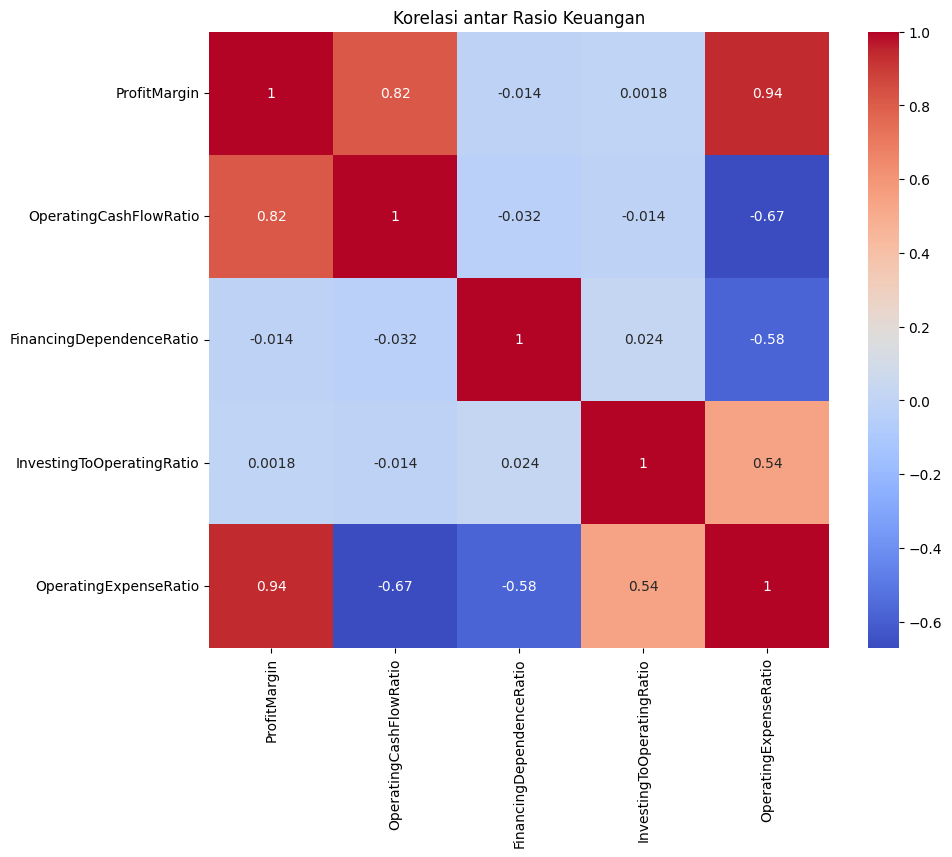

In [52]:
df_pd = df.select(
    "ProfitMargin",
    "OperatingCashFlowRatio",
    "FinancingDependenceRatio",
    "InvestingToOperatingRatio",
    "OperatingExpenseRatio"
).toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_pd.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antar Rasio Keuangan")
plt.show()


# Visualisasi Hasil Analisis

### Histogram Distribusi Profit Margin
#### Keterangan:
Histogram ini menunjukkan distribusi nilai `ProfitMargin` dalam dataset. Skala logaritmik digunakan untuk menangani outlier dan distribusi yang sangat skewed.

- Sumbu X menunjukkan nilai `ProfitMargin` (dalam skala log).
- Sumbu Y menunjukkan frekuensi (jumlah perusahaan) untuk setiap rentang nilai `ProfitMargin`.
- Bar yang lebih tinggi menunjukkan bahwa lebih banyak perusahaan memiliki nilai `ProfitMargin` dalam rentang tersebut.

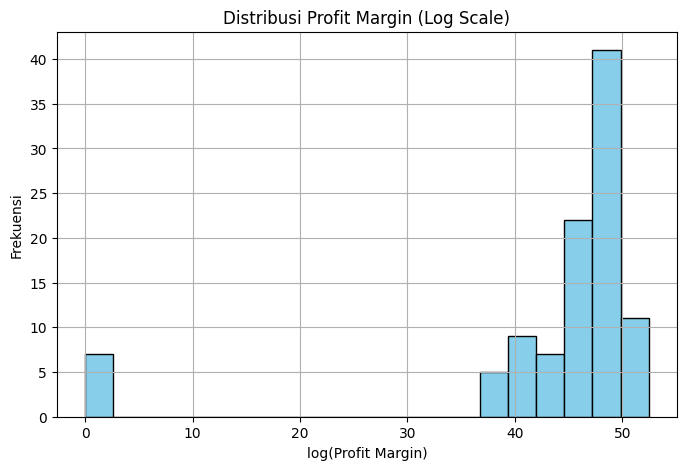

In [83]:
plt.figure(figsize=(8, 5))
plt.hist(np.log1p(df_pd['ProfitMargin']), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Profit Margin (Log Scale)')
plt.xlabel('log(Profit Margin)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()


### Scatter Plot: Profit Margin vs Operating Cash Flow Ratio
#### Keterangan:
Scatter plot ini menunjukkan hubungan antara `ProfitMargin` dan `OperatingCashFlowRatio`. Setiap titik mewakili satu perusahaan.
- Sumbu X menunjukkan nilai `ProfitMargin`.
- Sumbu Y menunjukkan nilai `OperatingCashFlowRatio`.
- Pola titik-titik menunjukkan hubungan antara kedua variabel:
  - Jika titik-titik membentuk garis diagonal ke atas, ada hubungan positif.
  - Jika titik-titik membentuk garis diagonal ke bawah, ada hubungan negatif.
  - Jika titik-titik tersebar acak, tidak ada hubungan yang jelas.

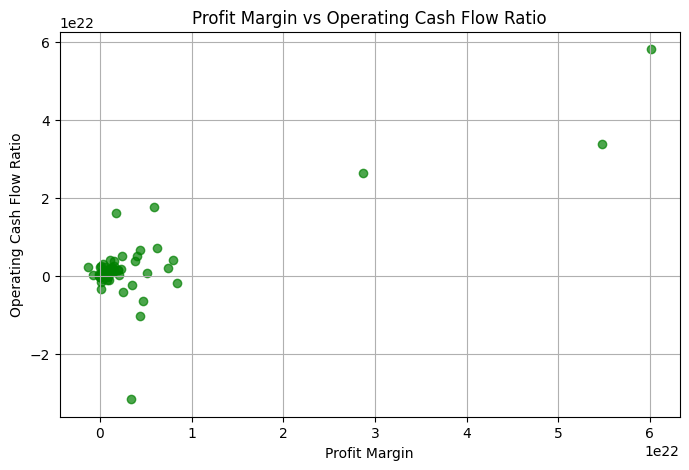

In [85]:
plt.figure(figsize=(8, 5))
plt.scatter(df_pd['ProfitMargin'], df_pd['OperatingCashFlowRatio'], color='green', alpha=0.7)
plt.title('Profit Margin vs Operating Cash Flow Ratio')
plt.xlabel('Profit Margin')
plt.ylabel('Operating Cash Flow Ratio')
plt.grid(True)
plt.show()


### Histogram Distribusi Cash to Asset Ratio
#### Keterangan:
Histogram ini menunjukkan distribusi nilai `CashToAssetRatio`, yang mengukur proporsi kas terhadap total aset perusahaan.

- Sumbu X menunjukkan nilai `CashToAssetRatio`.
- Sumbu Y menunjukkan frekuensi (jumlah perusahaan) untuk setiap rentang nilai `CashToAssetRatio`.
- Bar yang lebih tinggi menunjukkan bahwa lebih banyak perusahaan memiliki rasio kas terhadap aset dalam rentang tersebut.

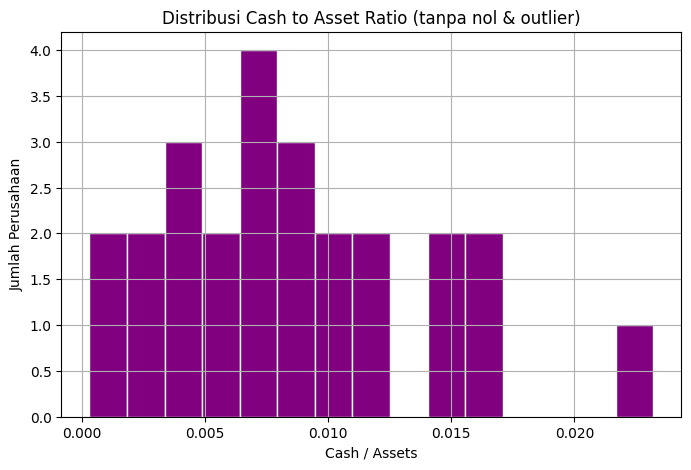

In [86]:
filtered_cash = df_pd[(df_pd['CashToAssetRatio'] != 0) & (df_pd['CashToAssetRatio'] < 0.05)]

plt.figure(figsize=(8, 5))
plt.hist(filtered_cash['CashToAssetRatio'], bins=15, color='purple', edgecolor='white')
plt.title('Distribusi Cash to Asset Ratio (tanpa nol & outlier)')
plt.xlabel('Cash / Assets')
plt.ylabel('Jumlah Perusahaan')
plt.grid(True)
plt.show()


### Boxplot Profit Margin Berdasarkan Kategori
#### Keterangan:
Boxplot ini menunjukkan distribusi `ProfitMargin` berdasarkan kategori tertentu, misalnya `IsProfitable` (untung vs rugi).
- Sumbu X menunjukkan kategori (misalnya, `IsProfitable`).
- Sumbu Y menunjukkan nilai `ProfitMargin`.
- Elemen-elemen dalam boxplot:
  - **Box**: Menunjukkan rentang interkuartil (IQR), yaitu Q1 (kuartil pertama) hingga Q3 (kuartil ketiga).
  - **Garis di dalam box**: Median (nilai tengah).
  - **Whisker**: Rentang data di luar IQR, biasanya hingga 1.5 * IQR.
  - **Titik di luar whisker**: Outlier.

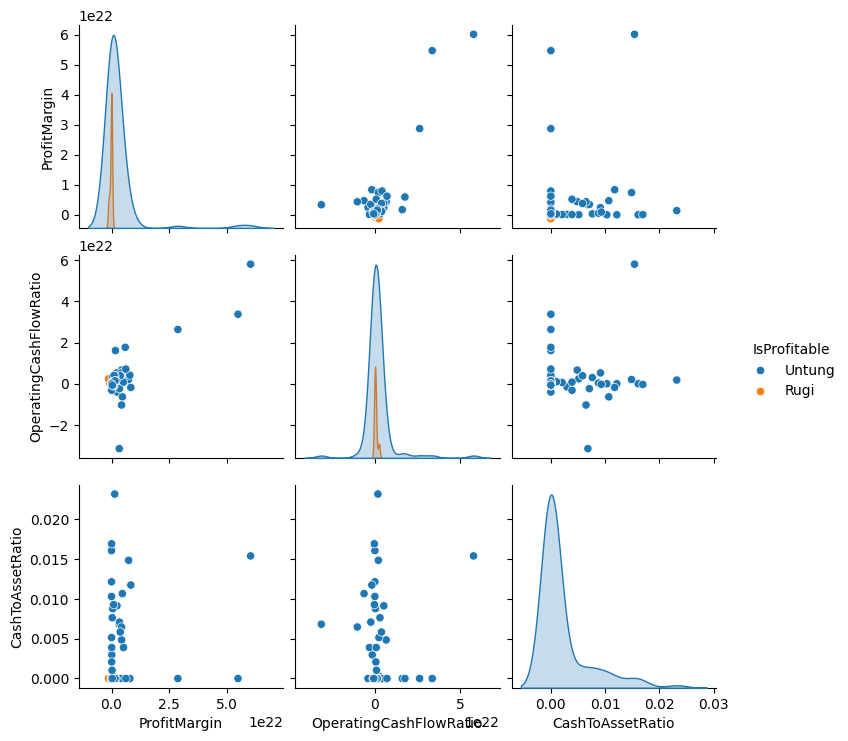

In [78]:
sns.pairplot(df_pd, vars=["ProfitMargin", "OperatingCashFlowRatio", "CashToAssetRatio"], hue="IsProfitable")
plt.show()